## Preprocessing

In [ ]:
 # Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Tensorflow
import tensorflow as tf

# suppress warnings
import warnings
warnings.filterwarnings('ignore')
#  Import and read the charity_data.csv.
import pandas as pd
df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df.drop(columns=["EIN", "NAME"], inplace=True)


In [ ]:
# Determine the number of unique values in each column.
df.nunique()


,0
APPLICATION_TYPE,17
AFFILIATION,6
CLASSIFICATION,71
USE_CASE,5
ORGANIZATION,4
STATUS,2
INCOME_AMT,9
SPECIAL_CONSIDERATIONS,2
ASK_AMT,8747
IS_SUCCESSFUL,2


In [ ]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
df.APPLICATION_TYPE.value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [ ]:

# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
app_type_counts = df["APPLICATION_TYPE"].value_counts()
application_types_to_replace = app_type_counts.loc[app_type_counts < threshold].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
df['APPLICATION_TYPE'].value_counts()

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
Other,276


In [ ]:

# Look at CLASSIFICATION value counts to identify and replace with "Other"
df.CLASSIFICATION.value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C4120,1
C8210,1
C2561,1


In [ ]:

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
class_counts = df["CLASSIFICATION"].value_counts()
classifications_to_replace = class_counts.loc[class_counts < 200].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
df['CLASSIFICATION'].value_counts()

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
Other,1197
C7000,777
C1700,287


In [ ]:

# Convert categorical data to numeric with `pd.get_dummies`
df2 = pd.get_dummies(df, dtype=int)
df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Split our preprocessed data into our features and target arrays

X = df2.drop(columns=["IS_SUCCESSFUL"])
y = df2.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(25724, 45) (8575, 45)


In [ ]:

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=len(X.columns)))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236 (944.00 B)

 Trainable params: 236 (944.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
fit_model = nn_model.fit(X_train, y_train, epochs=250, batch_size=32)


Epoch 1/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5337 - loss: 0.7181
Epoch 2/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5355 - loss: 0.6907
Epoch 3/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5304 - loss: 0.6914
Epoch 4/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5362 - loss: 0.6905
Epoch 5/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5359 - loss: 0.6907
Epoch 6/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5382 - loss: 0.6905
Epoch 7/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5273 - loss: 0.6918
Epoch 8/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5326 - loss: 0.6912
Epoch 9/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5309 - loss: 0.6914
Epoch 10/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5309 - loss: 0.6913
Epoch 11/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5357 - loss: 0.6908
Epoch 12/250
804/804 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - 3ms/step - accuracy: 0.5193 - loss: 0.7615
Loss: 0.7615370154380798, Accuracy: 0.5193002820014954


In [ ]:
# Export our model to HDF5 file
nn_model.save("AlphabetSoupCharity.h5")


In [ ]:
def doClassification_NN(nn_model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_proba = nn_model.predict(X_train)

    test_preds = nn_model.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_proba = nn_model.predict(X_test)

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """

    print(test_results)
    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()

In [ ]:
def doClassification_NN(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train, epochs=250, verbose=2)

    # Evaluate the model on test data
    model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)

    # Print the results
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Call the function using the defined model
doClassification_NN(nn_model, X_train, X_test, y_train, y_test)


Epoch 1/250
804/804 - 2s - 3ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 2/250
804/804 - 2s - 3ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 3/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6910
Epoch 4/250
804/804 - 3s - 3ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 5/250
804/804 - 3s - 4ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 6/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 7/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 8/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 9/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 10/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 11/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 12/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6912
Epoch 13/250
804/804 - 2s - 3ms/step - accuracy: 0.5324 - loss: 0.6913
Epoch 14/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 15/250
80

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=len(X.columns)))

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=5, activation="tanh", input_dim=len(X.columns)))

# Add our first Dense layer, including the input layer
nn2.add(tf.keras.layers.Dense(units=3, activation="relu", input_dim=len(X.columns)))

# Add the output layer that uses a probability activation function
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 5)                   │             230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282 (1.10 KB)

 Trainable params: 282 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
 # Train the model
fit_model = nn2.fit(X_train, y_train, epochs=250)

Epoch 1/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5321 - loss: 0.6913
Epoch 2/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5355 - loss: 0.6907
Epoch 3/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5311 - loss: 0.6913
Epoch 4/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5299 - loss: 0.6915
Epoch 5/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5331 - loss: 0.6910
Epoch 6/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5266 - loss: 0.6918
Epoch 7/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5299 - loss: 0.6916
Epoch 8/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5334 - loss: 0.6910
Epoch 9/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5327 - loss: 0.6913
Epoch 10/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5311 - loss: 0.6913
Epoch 11/250
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5364 - loss: 0.6907
Epoch 12/250
804/804 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
doClassification_NN(nn2, X_train, X_test, y_train, y_test)

Epoch 1/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 2/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 3/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 4/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 5/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 6/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 7/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 8/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6910
Epoch 9/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 10/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 11/250
804/804 - 2s - 3ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 12/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 13/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 14/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 15/250
80

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=50, activation="sigmoid", input_dim=len(X.columns)))

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=40, activation="relu", input_dim=len(X.columns)))

# Add our first Dense layer, including the input layer
nn3.add(tf.keras.layers.Dense(units=30, activation="tanh", input_dim=len(X.columns)))

# Add the output layer that uses a probability activation function
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 50)                  │           2,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 40)                  │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,601 (21.88 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Wait for 5 epochs with no improvement
    min_delta=0.001,     # Minimum change to qualify as an improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

In [ ]:
# Train the model
fit_model = nn3.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),  # Validation data
    callbacks=[early_stopping]  # Use early stopping
)


Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6873 - loss: 0.6025 - val_accuracy: 0.7236 - val_loss: 0.5647
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7218 - loss: 0.5645 - val_accuracy: 0.7254 - val_loss: 0.5658
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7266 - loss: 0.5585 - val_accuracy: 0.7269 - val_loss: 0.5655
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7308 - loss: 0.5550 - val_accuracy: 0.7254 - val_loss: 0.5564
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7300 - loss: 0.5485 - val_accuracy: 0.7264 - val_loss: 0.5594
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7352 - loss: 0.5467 - val_accuracy: 0.7248 - val_loss: 0.5592
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7373 - loss: 0.5455 - val_accuracy: 0.7312 - val_loss: 0.5536
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7324 - loss: 0.5487 - val_accu

In [ ]:
doClassification_NN(nn2, X_train, X_test, y_train, y_test)


Epoch 1/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 2/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 3/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 4/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 5/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 6/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 7/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 8/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 9/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 10/250
804/804 - 1s - 1ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 11/250
804/804 - 1s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 12/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 13/250
804/804 - 2s - 2ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 14/250
804/804 - 2s - 3ms/step - accuracy: 0.5324 - loss: 0.6911
Epoch 15/250
80

In [ ]:
nn_model.save("AlphabetSoupCharity_Optimization.h5")


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)

    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)

    train_results = f"""TRAIN METRICS
    Confusion Matrix:
    {train_cf}

    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """

    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)

    test_results = f"""TEST METRICS
    Confusion Matrix:
    {test_cf}

    AUC: {test_auc}
     Classification Report:
    {test_cr}
    """

    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)

    # Set figure size
    plt.figure(figsize=(6, 6))

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')

    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")

    # Display the plot
    plt.show()


TRAIN METRICS
    Confusion Matrix:
    [[ 8469  3559]
 [ 2758 10938]]

    AUC: 0.8211372615717143

    Classification Report:
                  precision    recall  f1-score   support

           0       0.75      0.70      0.73     12028
           1       0.75      0.80      0.78     13696

    accuracy                           0.75     25724
   macro avg       0.75      0.75      0.75     25724
weighted avg       0.75      0.75      0.75     25724

    
TEST METRICS
    Confusion Matrix:
    [[2685 1325]
 [1026 3539]]

    AUC: 0.7819667151944891
     Classification Report:
                  precision    recall  f1-score   support

           0       0.72      0.67      0.70      4010
           1       0.73      0.78      0.75      4565

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575

    


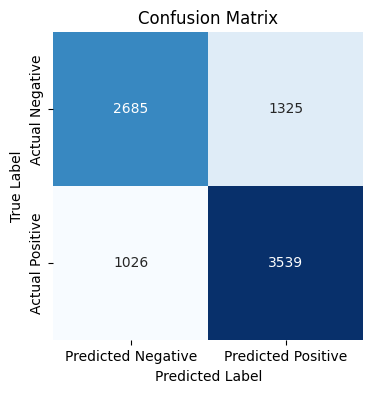

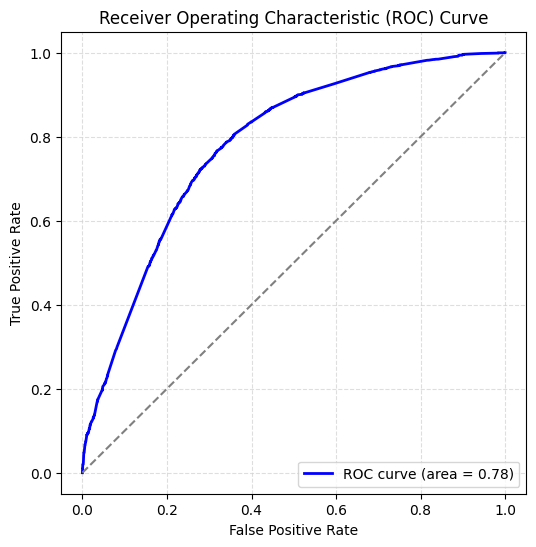

In [ ]:
 # Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)